In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset.csv") 

In [3]:
df.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Instagram,2559,0.273
1,You open ur phone and have a notif badge on in...,Mobile,Mobile respondents,Facebook,1182,0.126
2,You open ur phone and have a notif badge on in...,Web,Web-based respondents,Instagram,30,0.256
3,You open ur phone and have a notif badge on in...,Gender,Female respondents,Instagram,1576,0.300
4,You open ur phone and have a notif badge on in...,Gender,Female respondents,Facebook,644,0.122


In [4]:
df.tail()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
140,You open ur phone and have a notif badge on in...,Custom,your parents make? $50K-$90K,Linkedin,4,0.015
141,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other ??,Instagram,5,0.217
142,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other ??,Facebook,6,0.261
143,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other ??,Snapchat,11,0.478
144,You open ur phone and have a notif badge on in...,Custom,Mac or PC? Other ??,Linkedin,1,0.043


In [5]:
df.shape

(145, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             145 non-null    object 
 1   Segment Type         145 non-null    object 
 2   Segment Description  145 non-null    object 
 3   Answer               145 non-null    object 
 4   Count                145 non-null    int64  
 5   Percentage           145 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 6.9+ KB


In [7]:
df.isnull().sum()

Question               0
Segment Type           0
Segment Description    0
Answer                 0
Count                  0
Percentage             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Count,Percentage
count,145.000000,145.000000
mean,136.724138,0.246448
std,359.129919,0.195346
min,0.000000,0.000000
25%,6.000000,0.059000
50%,20.000000,0.217000
75%,93.000000,0.406000
max,2559.000000,1.000000


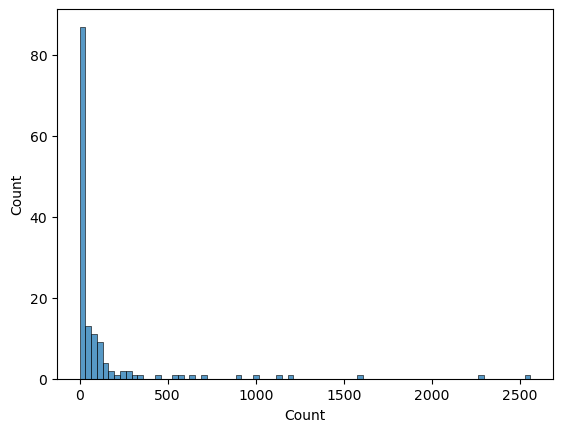

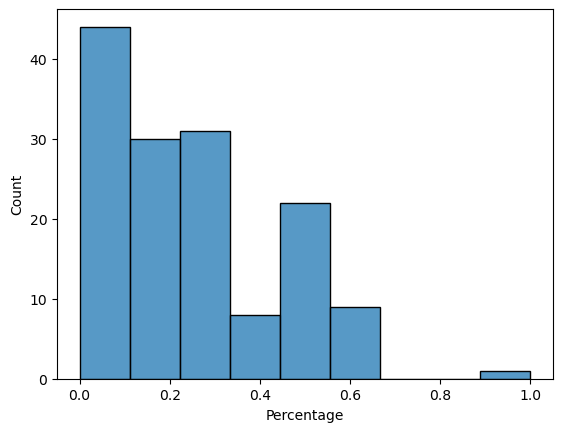

In [10]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x = i)
    plt.show()

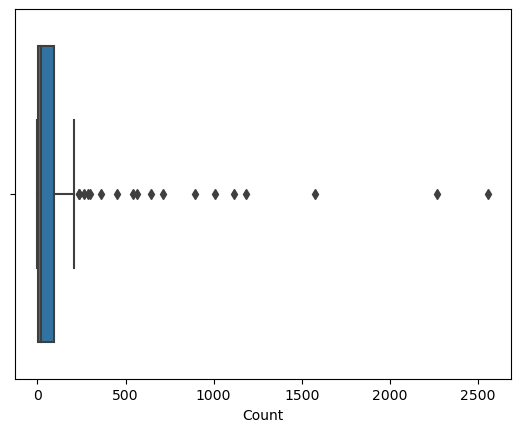

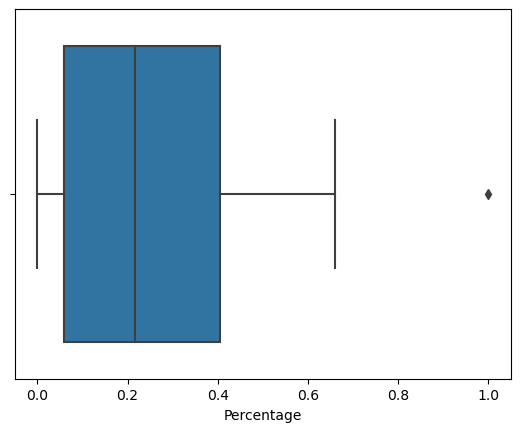

In [11]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x = i)
    plt.show()

In [12]:
df.select_dtypes(include = "number").columns

Index(['Count', 'Percentage'], dtype='object')

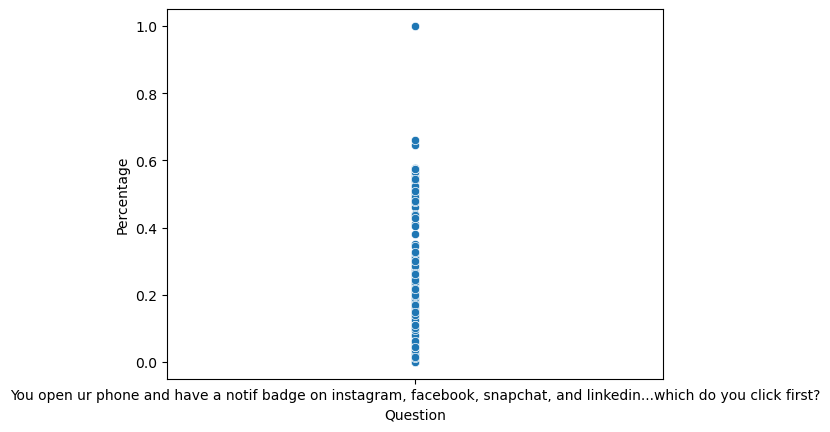

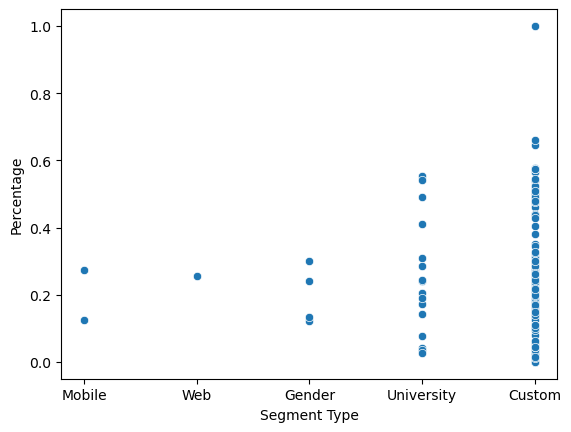

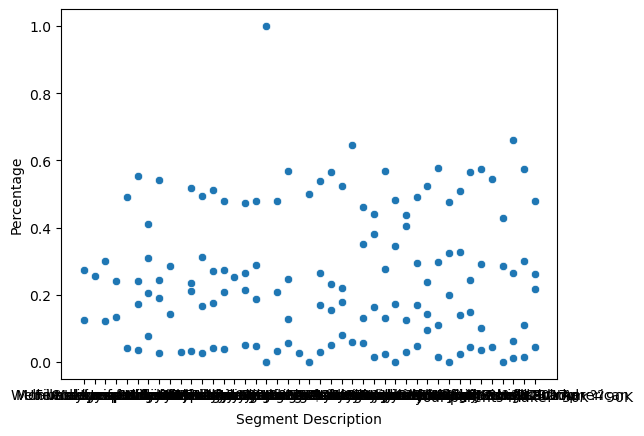

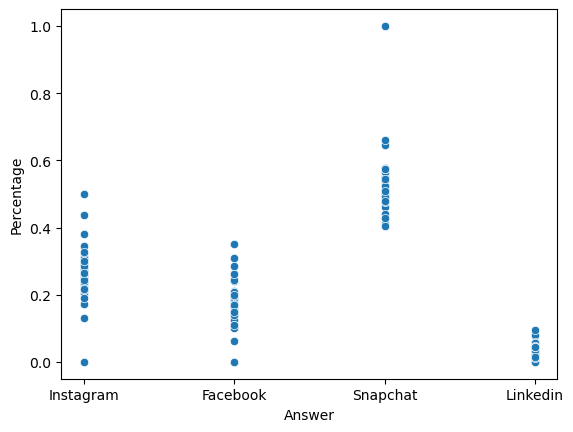

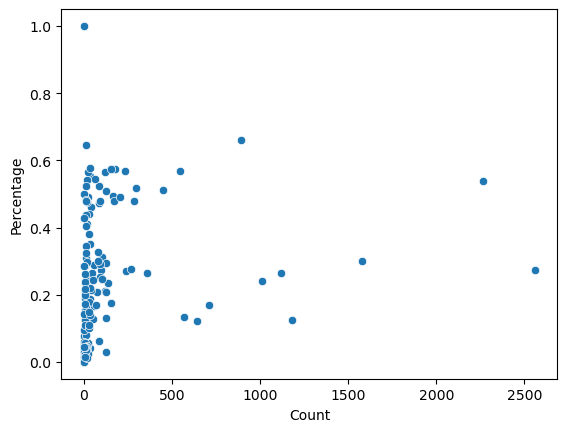

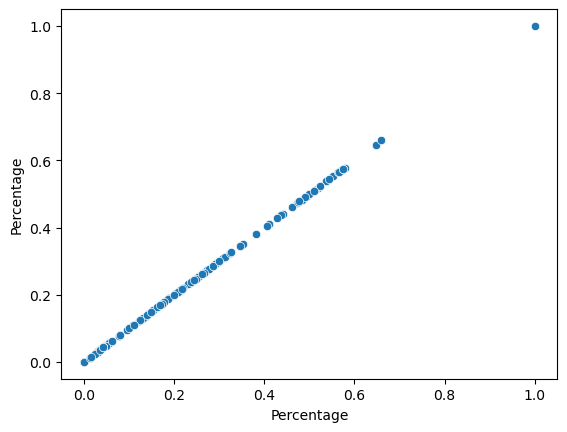

In [13]:
for i in ['Question','Segment Type','Segment Description','Answer','Count','Percentage']:
    
   sns.scatterplot(data = df, x =i,y="Percentage")
   plt.show()


<Axes: >

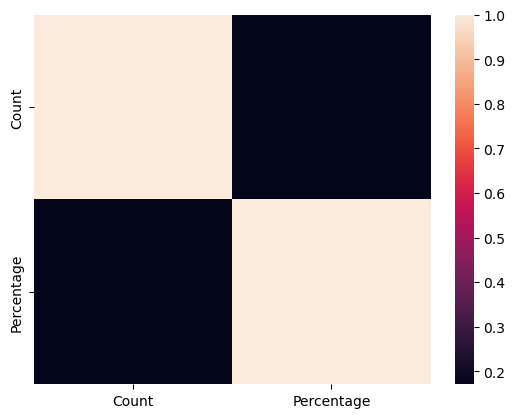

In [14]:
s = df.select_dtypes(include = "number").corr()
sns.heatmap(s)

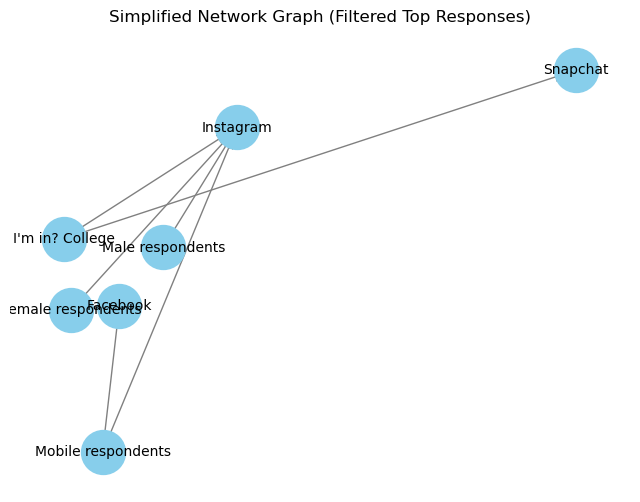

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Filter top relationships based on "Count" (you can change this threshold)
top_responses = data[data['Count'] > 1000]

# Create a directed graph
G = nx.DiGraph()

# Add edges between "Segment Description" and "Answer" based on "Count"
for _, row in top_responses.iterrows():
    G.add_edge(row['Segment Description'], row['Answer'], weight=row['Count'])

# Use a less dense layout (circular or kamada_kawai)
pos = nx.kamada_kawai_layout(G)

# Draw the graph with simpler, smaller nodes and edges
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1000)

# Draw edges with reduced width
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=15, edge_color='gray', width=1)

# Draw labels for nodes
nx.draw_networkx_labels(G, pos, font_size=10)

# Display the graph
plt.title("Simplified Network Graph (Filtered Top Responses)")
plt.axis("off")
plt.show()


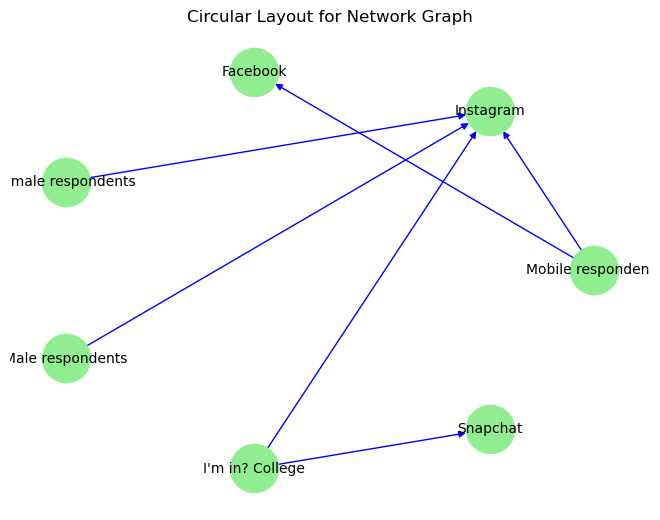

In [22]:
# Different layouts for node positioning
pos_circular = nx.circular_layout(G)  # Circular layout
pos_spring = nx.spring_layout(G)  # Spring layout
pos_shell = nx.shell_layout(G)  # Shell layout

# Example: Using circular layout for a visually clear graph
nx.draw(G, pos=pos_circular, with_labels=True, node_color='lightgreen', node_size=1200, edge_color='blue', font_size=10)
plt.title("Circular Layout for Network Graph")
plt.show()


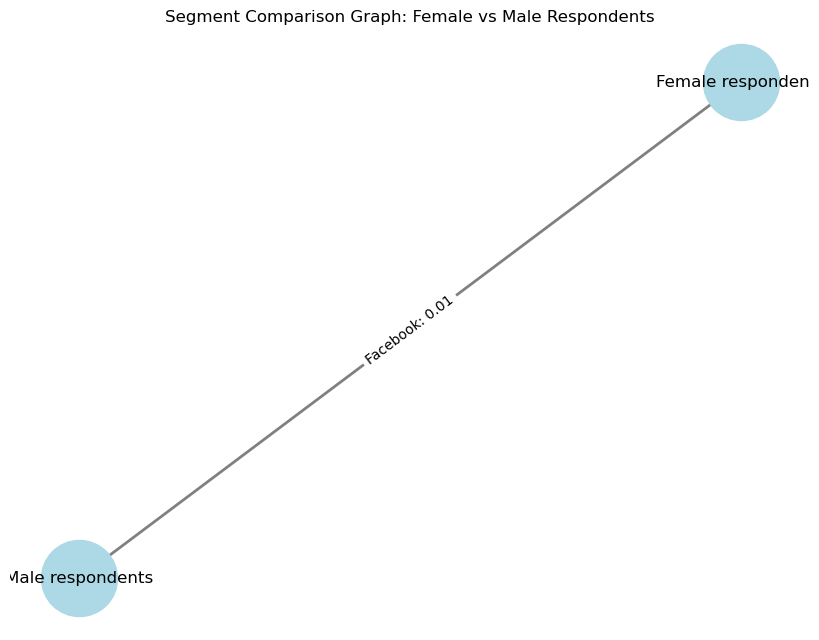

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Define segments to compare (e.g., Female respondents, Male respondents)
segments = ["Female respondents", "Male respondents"]

# Create an empty graph
G = nx.Graph()

# Filter dataset to include only the specified segments
filtered_data = data[data['Segment Description'].isin(segments)]

# Create a dictionary to store the answers for each segment
segment_answers = {}
for segment in segments:
    segment_data = filtered_data[filtered_data['Segment Description'] == segment]
    segment_answers[segment] = {row['Answer']: row['Count'] for _, row in segment_data.iterrows()}

# Compare segments based on common answers and calculate the difference in their responses
for answer in set(segment_answers[segments[0]].keys()).intersection(segment_answers[segments[1]].keys()):
    count_female = segment_answers['Female respondents'].get(answer, 0)
    count_male = segment_answers['Male respondents'].get(answer, 0)
    
    # Calculate the difference or similarity in response counts
    similarity = 1 / (1 + abs(count_female - count_male))  # Inverse of absolute difference

    # Add an edge between the segments with the weight as the similarity score
    G.add_edge('Female respondents', 'Male respondents', weight=similarity, label=f'{answer}: {similarity:.2f}')

# Use a layout and draw the graph
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))

# Draw nodes and edges with weights
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, edge_color='gray', width=2)

# Draw edge labels (showing the answer and similarity score)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the graph
plt.title("Segment Comparison Graph: Female vs Male Respondents")
plt.show()


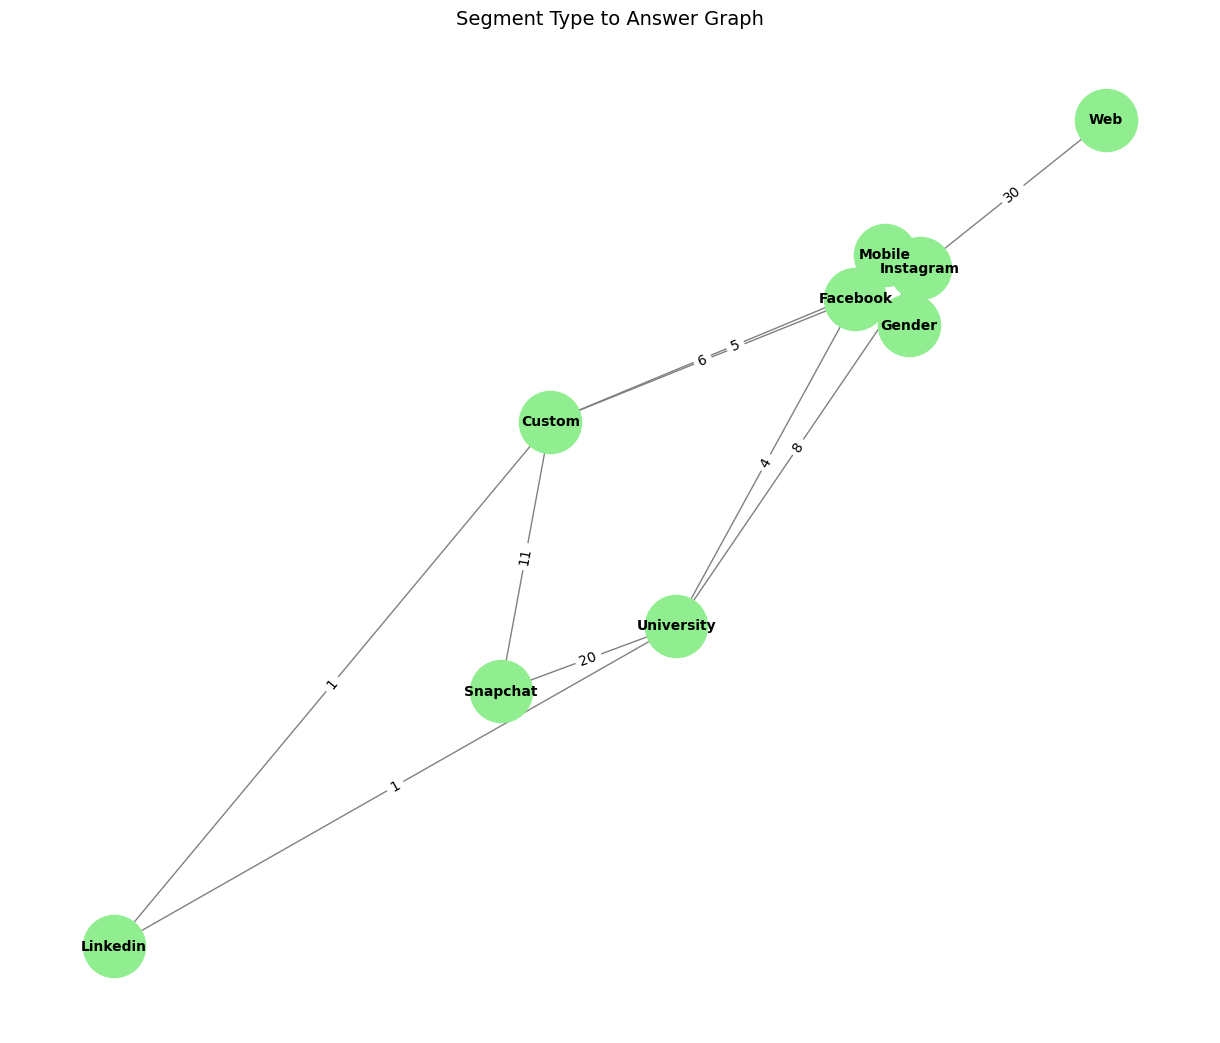

In [29]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Create an empty graph
G = nx.Graph()

# Iterate through the dataset and add edges between "Segment Type" and "Answer"
for _, row in data.iterrows():
    segment_type = row['Segment Type']  # Example: Mobile, Web, Gender
    answer = row['Answer']               # Example: Instagram, Facebook
    count = row['Count']                 # Count of responses

    # Add an edge between segment type and answer with the weight as the count
    G.add_edge(segment_type, answer, weight=count)

# Use a layout to avoid overlap
pos = nx.spring_layout(G, k=0.5)  # k controls the distance between nodes

# Increase figure size for better visualization
plt.figure(figsize=(12, 10))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, edge_color='gray', font_size=10, font_weight='bold')

# Draw edge labels (showing the response count)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the graph
plt.title("Segment Type to Answer Graph", fontsize=14)
plt.axis("off")
plt.show()


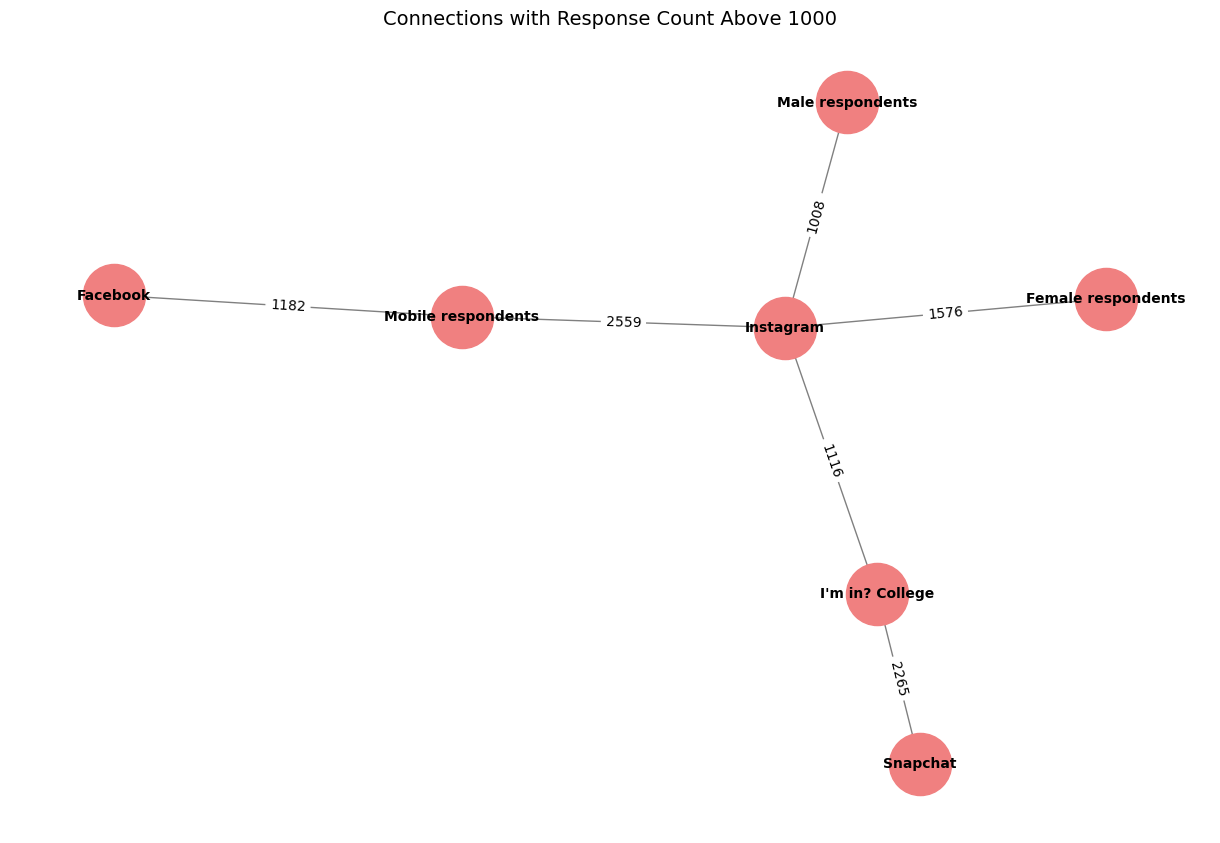

In [30]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load dataset
file_path = 'Dataset.csv'
data = pd.read_csv(file_path)

# Create an empty graph
G = nx.Graph()

# Set your response count threshold
response_count_threshold = 1000  # Adjust this value as needed

# Iterate through the dataset to add edges between "Segment Description" and "Answer" if above the threshold
for _, row in data.iterrows():
    segment_description = row['Segment Description']  # Example: Mobile respondents, Female respondents
    answer = row['Answer']                             # Example: Instagram, Facebook
    count = row['Count']                               # Count of responses

    # Only add an edge if the count is above the threshold
    if count > response_count_threshold:
        G.add_edge(segment_description, answer, weight=count)

# Use spring layout for the graph
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Increase figure size for better visualization
plt.figure(figsize=(12, 8))

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=2000, edge_color='gray', font_size=10, font_weight='bold')

# Draw edge labels (showing the response count)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the graph
plt.title(f"Connections with Response Count Above {response_count_threshold}", fontsize=14)
plt.axis("off")
plt.show()


In [35]:
pip install pandas networkx matplotlib


Note: you may need to restart the kernel to use updated packages.


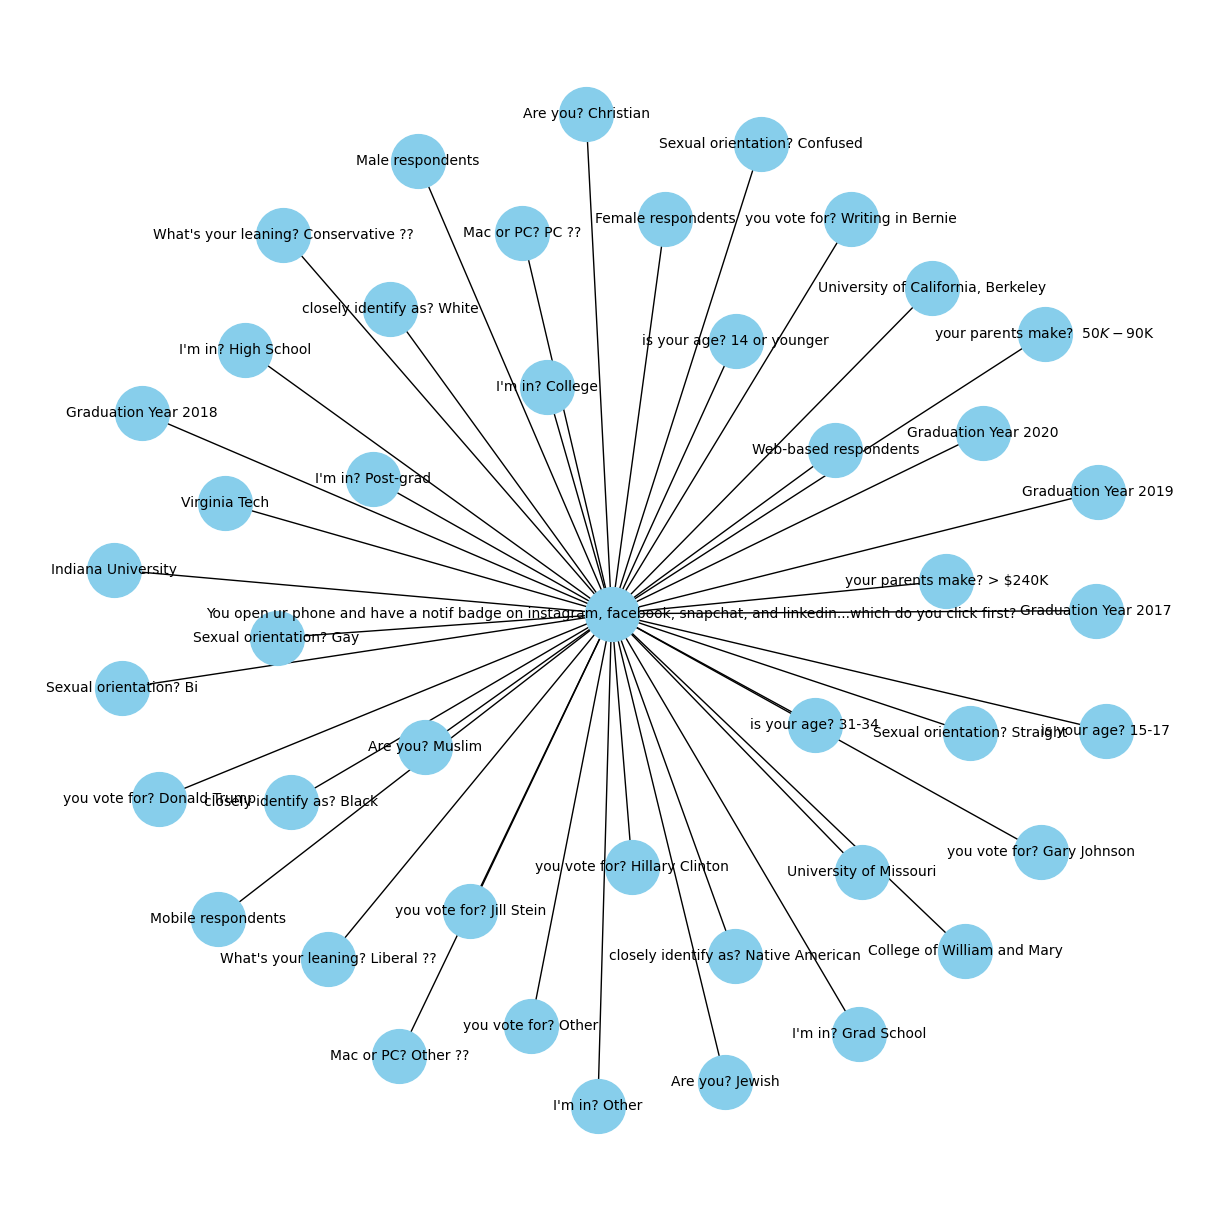

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Dataset.csv')

# Create a new graph
G = nx.Graph()

# Iterate through the dataset and add nodes and edges for 'Question' and 'Segment Description'
for index, row in data.iterrows():
    question = row['Question']  # Replace with the correct column name for 'Question'
    segment_desc = row['Segment Description']  # Replace with the correct column name for 'Segment Description'
    
    # Add 'Question' and 'Segment Description' as nodes
    G.add_node(question, label='Question')
    G.add_node(segment_desc, label='Segment Description')
    
    # Add an edge between 'Question' and 'Segment Description'
    G.add_edge(question, segment_desc)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=1500, font_size=10)
plt.show()


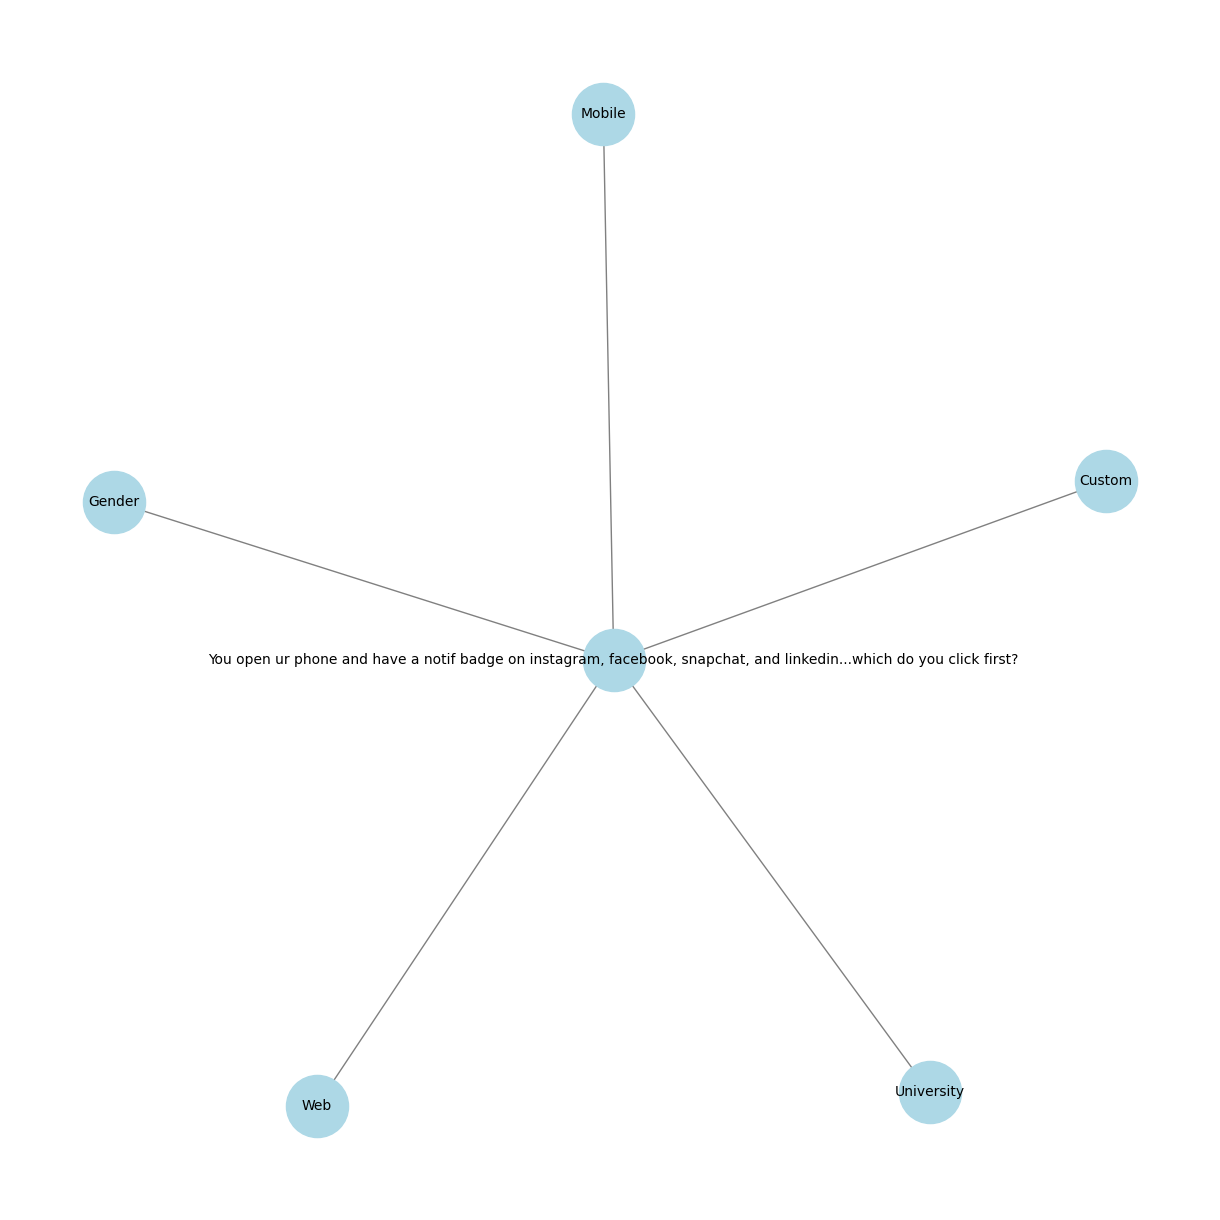

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Dataset.csv')

# Create a new graph
G = nx.Graph()

# Add nodes and edges between 'Question' and 'Segment Type'
for index, row in data.iterrows():
    question = row['Question']       # Replace with the actual column name for 'Question'
    segment_type = row['Segment Type']  # Replace with the actual column name for 'Segment Type'
    
    # Add nodes for Question and Segment Type
    G.add_node(question, label='Question')
    G.add_node(segment_type, label='Segment Type')
    
    # Add an edge between Question and Segment Type
    G.add_edge(question, segment_type)

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_color="lightblue", node_size=2000, font_size=10, edge_color="gray")
plt.show()


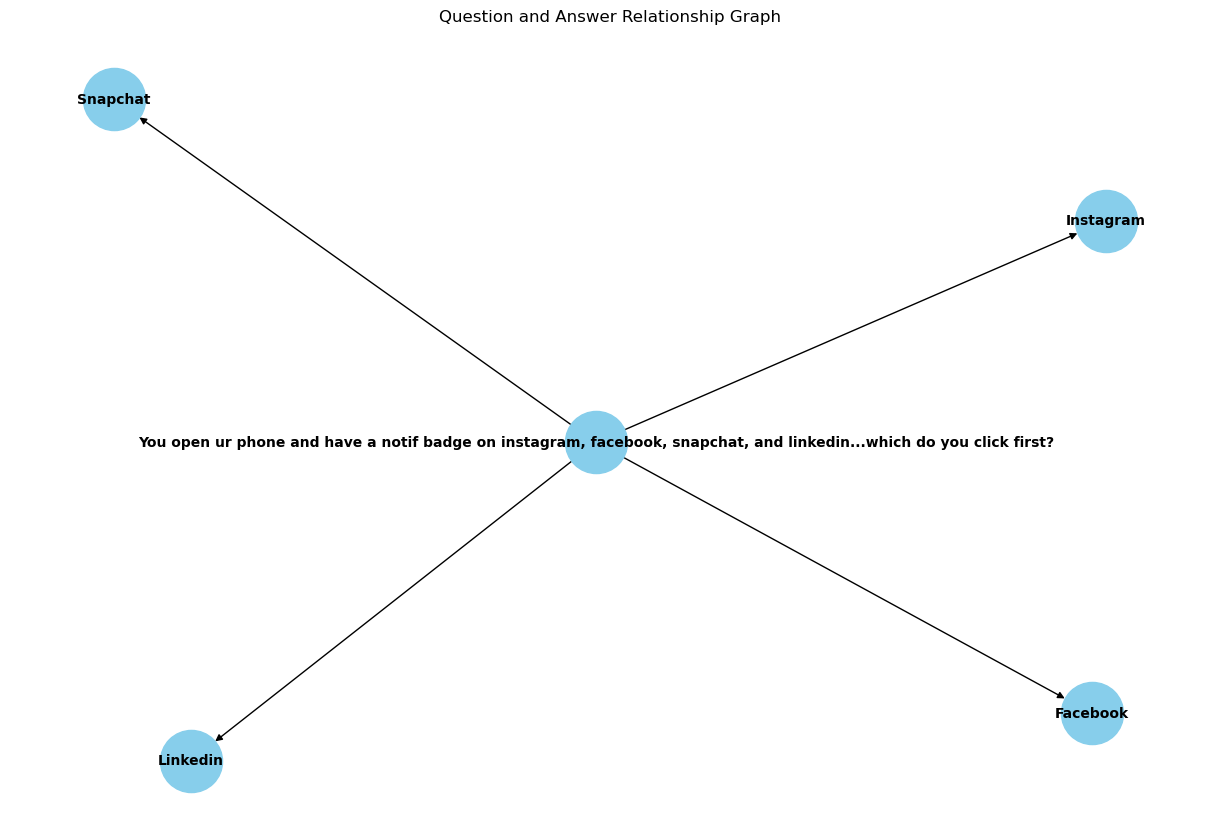

In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Dataset.csv')  # Ensure the correct path

# Create a new directed graph
G = nx.DiGraph()

# Add edges between Question and Answer
for index, row in data.iterrows():
    question = row['Question']  # Replace with actual column name for questions
    answer = row['Answer']      # Replace with actual column name for answers
    G.add_edge(question, answer)  # Create a directed edge from question to answer

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Position the nodes using the spring layout
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title('Question and Answer Relationship Graph')
plt.show()


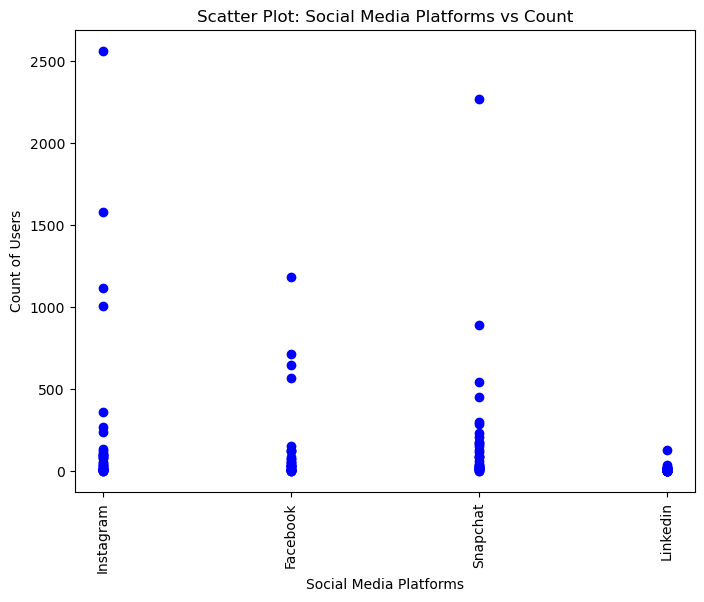

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Make sure to replace 'your_file.csv' with your actual file path)
data = pd.read_csv('Dataset.csv')

# Extracting relevant data for plotting
platforms = data['Answer']
counts = data['Count']
percentages = data['Percentage']

# Scatter Plot: Platform vs. Count
plt.figure(figsize=(8,6))
plt.scatter(platforms, counts, color='blue')
plt.title('Scatter Plot: Social Media Platforms vs Count')
plt.xlabel('Social Media Platforms')
plt.ylabel('Count of Users')
plt.xticks(rotation=90)
plt.show()


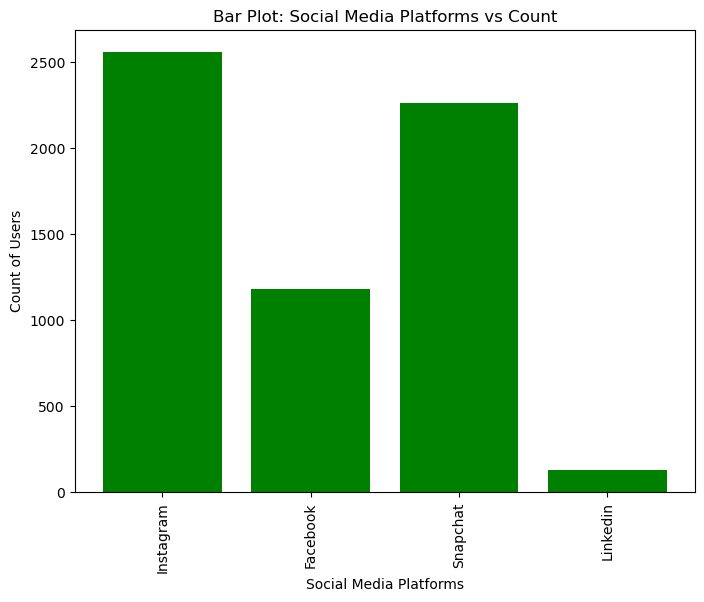

In [17]:
plt.figure(figsize=(8,6))
plt.bar(platforms, counts, color='green')
plt.title('Bar Plot: Social Media Platforms vs Count')
plt.xlabel('Social Media Platforms')
plt.ylabel('Count of Users')
plt.xticks(rotation=90)
plt.show()


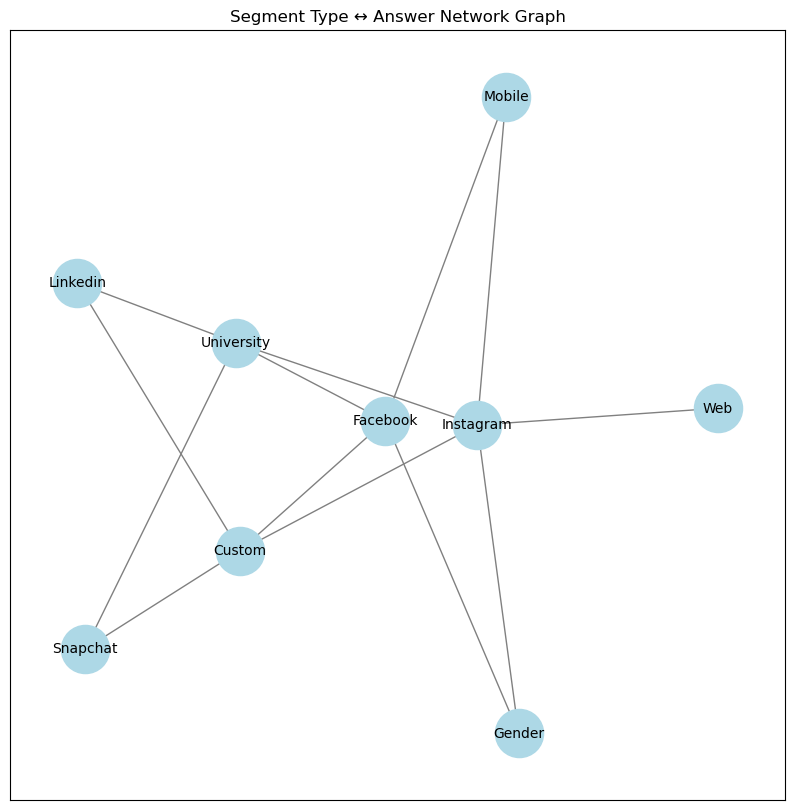

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph for Segment Type ↔ Answer
G_type_answer = nx.from_pandas_edgelist(df, source='Segment Type', target='Answer')

# Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx(G_type_answer, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=10)
plt.title('Segment Type ↔ Answer Network Graph')
plt.show()


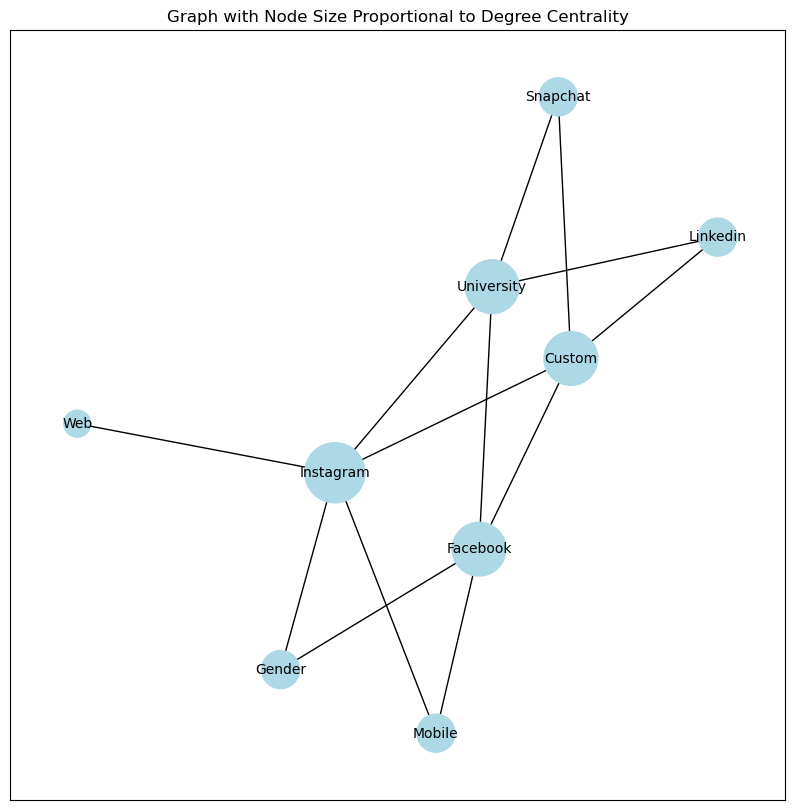

In [28]:
# Calculate degree centrality for Segment Type ↔ Answer
degree_centrality = nx.degree_centrality(G_type_answer)

# Draw graph with node sizes proportional to degree centrality
plt.figure(figsize=(10, 10))
nx.draw_networkx(
    G_type_answer, 
    with_labels=True, 
    node_color='lightblue', 
    node_size=[v * 3000 for v in degree_centrality.values()],  # Scale node size by centrality
    font_size=10
)
plt.title('Graph with Node Size Proportional to Degree Centrality')
plt.show()


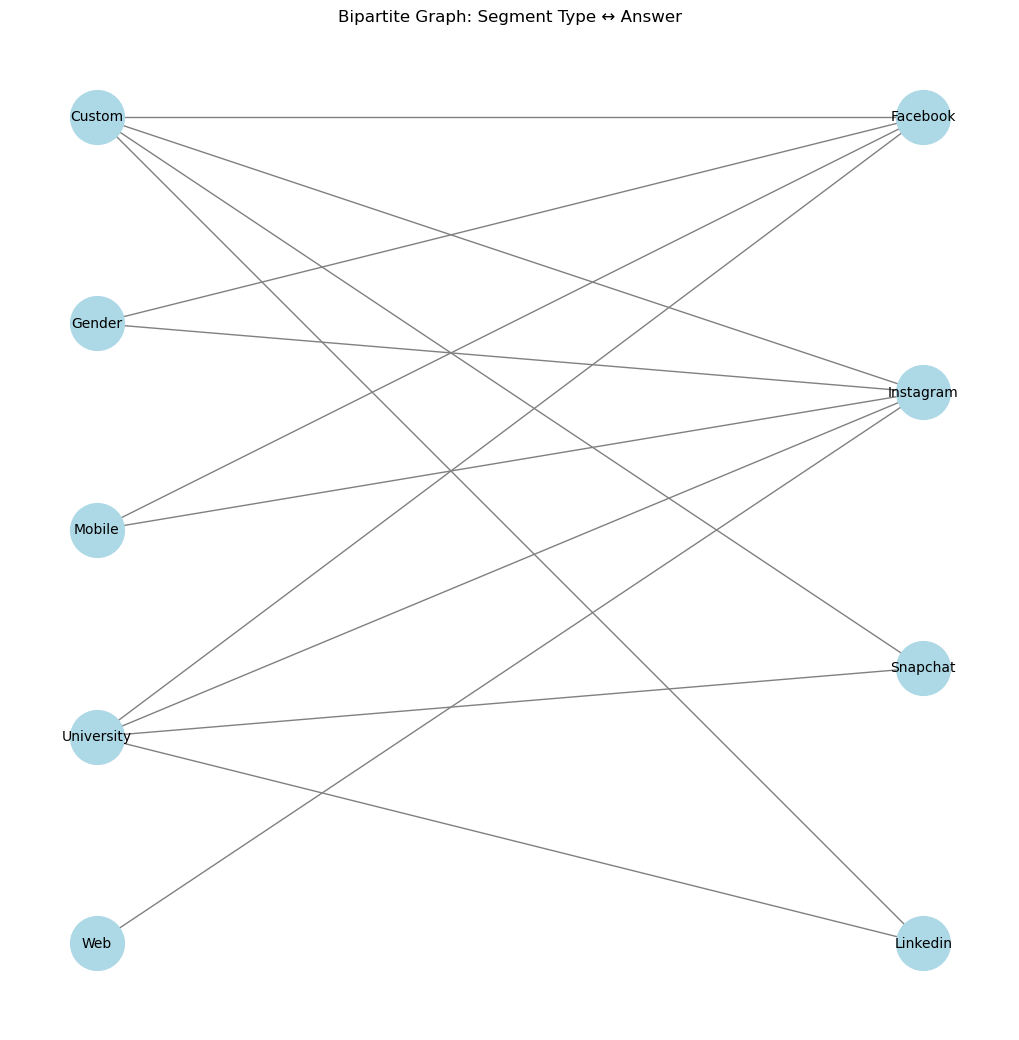

In [32]:
from networkx.algorithms import bipartite

# Create a bipartite graph
B = nx.Graph()

# Add nodes with the bipartite node attribute
segment_types = df['Segment Type'].unique()
answers = df['Answer'].unique()

B.add_nodes_from(segment_types, bipartite=0)  # One set of nodes
B.add_nodes_from(answers, bipartite=1)  # Another set of nodes

# Add edges based on the relationships between Segment Type and Answer
B.add_edges_from(zip(df['Segment Type'], df['Answer']))

# Plot the bipartite graph
plt.figure(figsize=(10, 10))
pos = nx.bipartite_layout(B, segment_types)  # Layout for bipartite graph

nx.draw(B, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10)
plt.title('Bipartite Graph: Segment Type ↔ Answer')
plt.show()


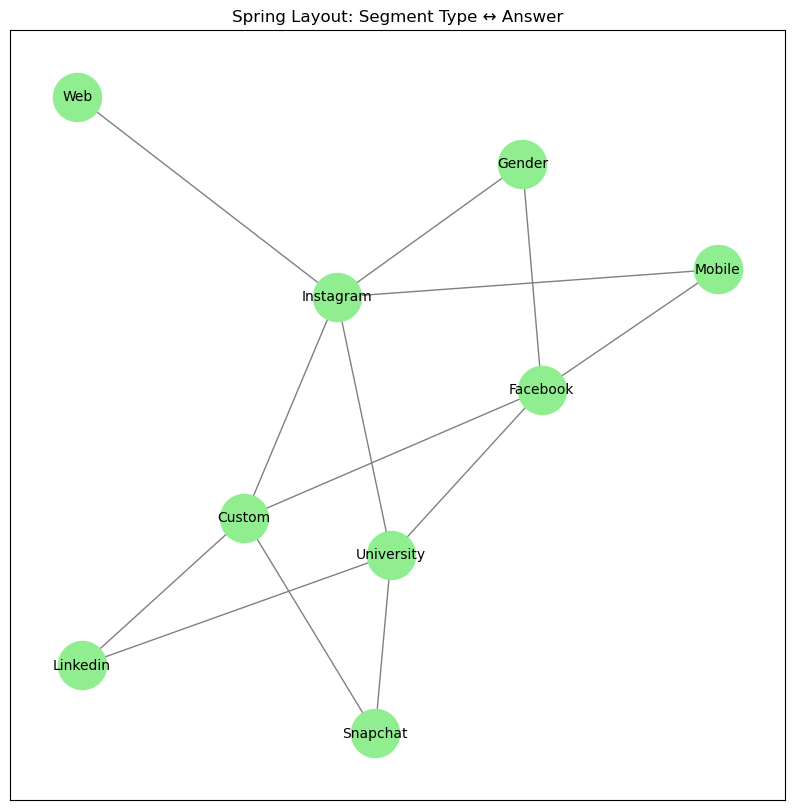

In [34]:
plt.figure(figsize=(10, 10))

# Spring layout
pos = nx.spring_layout(G_type_answer)
nx.draw_networkx(G_type_answer, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=1200, font_size=10)
plt.title('Spring Layout: Segment Type ↔ Answer')
plt.show()


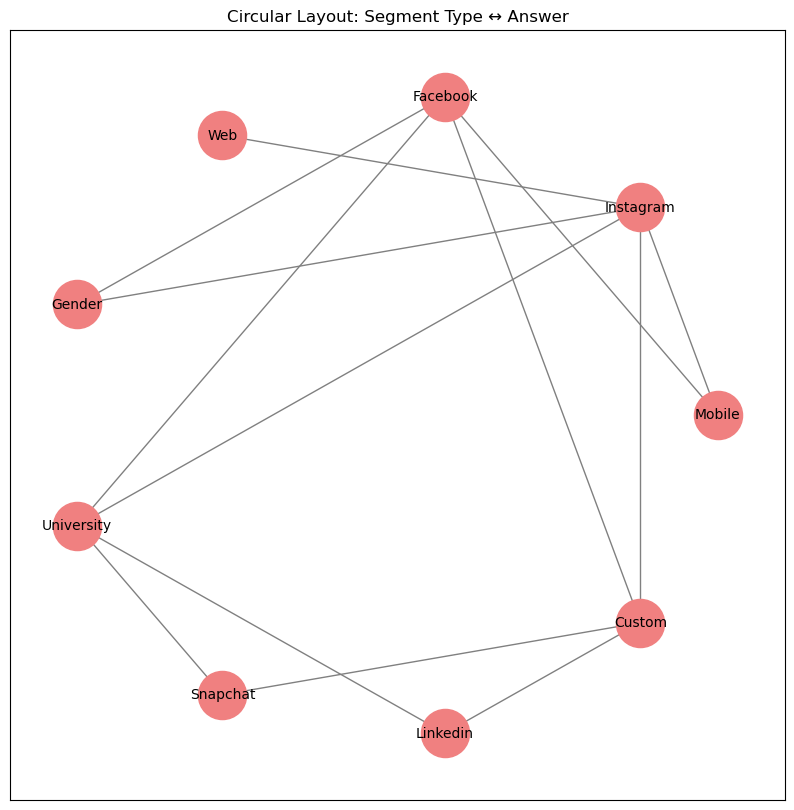

In [35]:
plt.figure(figsize=(10, 10))

# Circular layout
pos = nx.circular_layout(G_type_answer)
nx.draw_networkx(G_type_answer, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=1200, font_size=10)
plt.title('Circular Layout: Segment Type ↔ Answer')
plt.show()


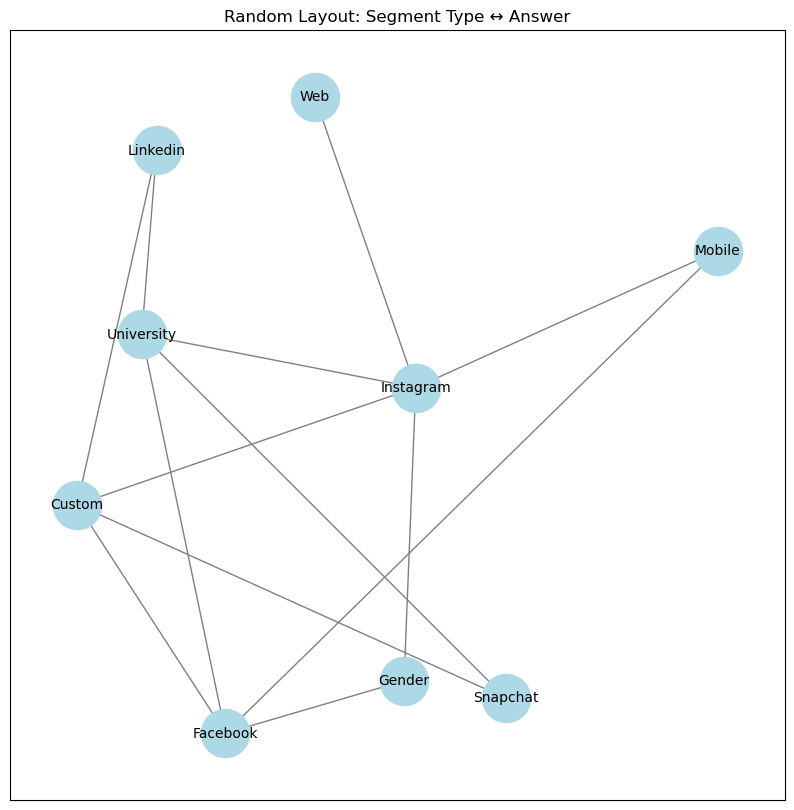

In [36]:
plt.figure(figsize=(10, 10))

# Random layout
pos = nx.random_layout(G_type_answer)
nx.draw_networkx(G_type_answer, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=10)
plt.title('Random Layout: Segment Type ↔ Answer')
plt.show()


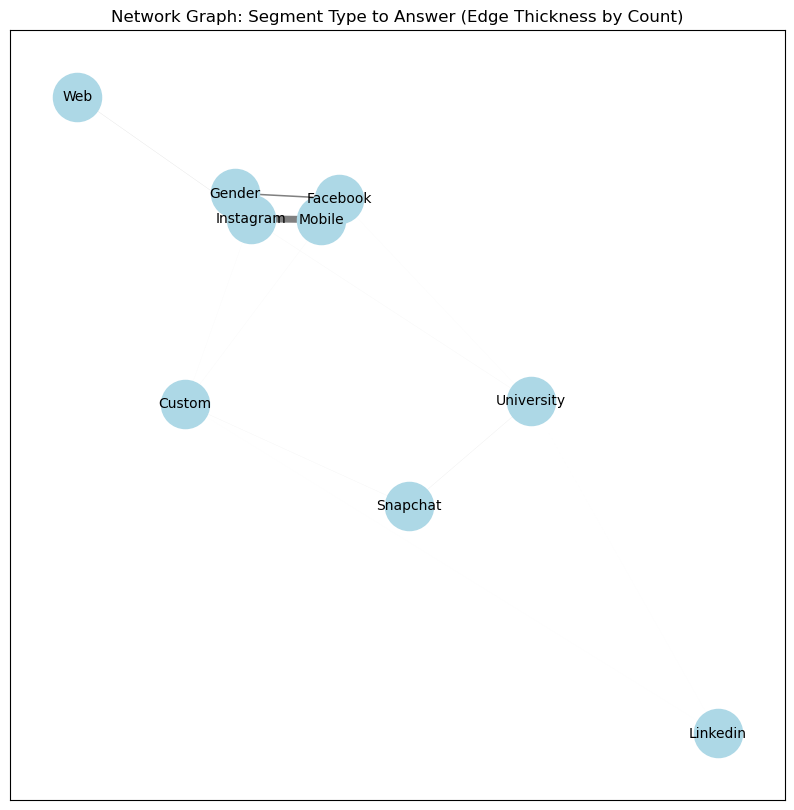

In [44]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and contains 'Segment Type', 'Answer', and 'Count'

# Create a graph
G_type_answer = nx.Graph()

# Add edges between Segment Type and Answer, weighted by Count
for index, row in df.iterrows():
    G_type_answer.add_edge(row['Segment Type'], row['Answer'], weight=row['Count'])

# Get edge weights (Count) for edge thickness
weights = [d['weight'] for (u, v, d) in G_type_answer.edges(data=True)]

# Normalize weights for better visualization
max_weight = max(weights) if weights else 1  # Avoid division by zero
normalized_weights = [w / max_weight * 5 for w in weights]  # Scale weights between 1 and 5

# Draw the graph
plt.figure(figsize=(10, 10))

# Get positions for nodes using spring layout (force-directed layout)
pos = nx.spring_layout(G_type_answer)

# Draw nodes (Segment Type and Answer)
nx.draw_networkx_nodes(G_type_answer, pos, node_color='lightblue', node_size=1200)

# Draw edges with widths proportional to the 'Count' values
nx.draw_networkx_edges(G_type_answer, pos, width=normalized_weights, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G_type_answer, pos, font_size=10)

# Title for the graph
plt.title('Network Graph: Segment Type to Answer (Edge Thickness by Count)')
plt.show()


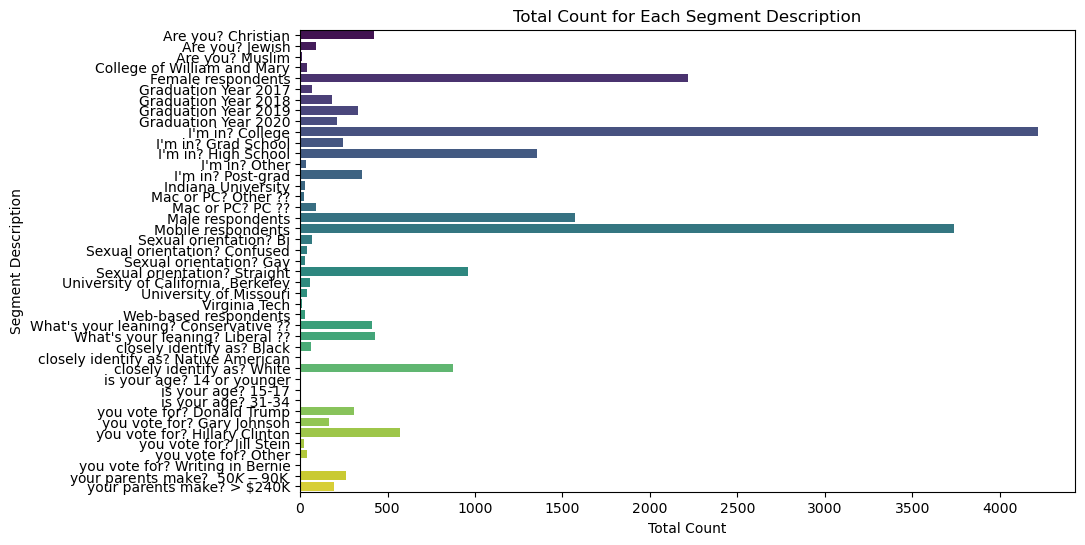

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data to get the total Count for each Segment Description
desc_count = df.groupby('Segment Description')['Count'].sum().reset_index()

# Plot barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Segment Description', data=desc_count, palette='viridis')

plt.title('Total Count for Each Segment Description')
plt.xlabel('Total Count')
plt.ylabel('Segment Description')
plt.show()


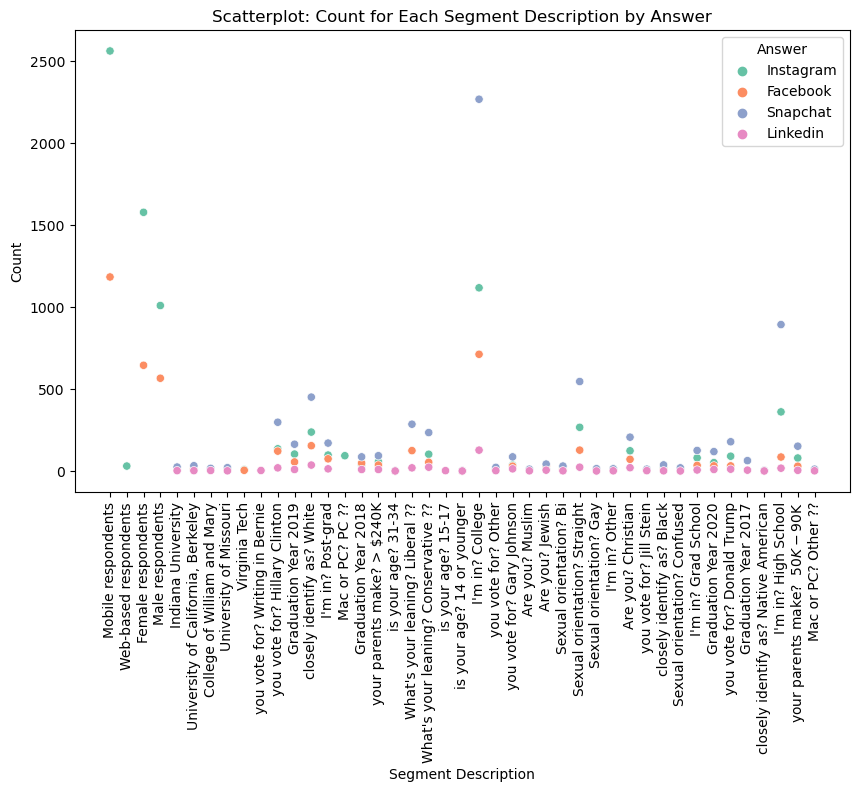

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Segment Description', y='Count', data=df, hue='Answer', palette='Set2')

plt.title('Scatterplot: Count for Each Segment Description by Answer')
plt.xlabel('Segment Description')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_34020\275657125.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Segment Description', y='Answer', size='Count', data=df, sizes=(20, 200), palette='cool')


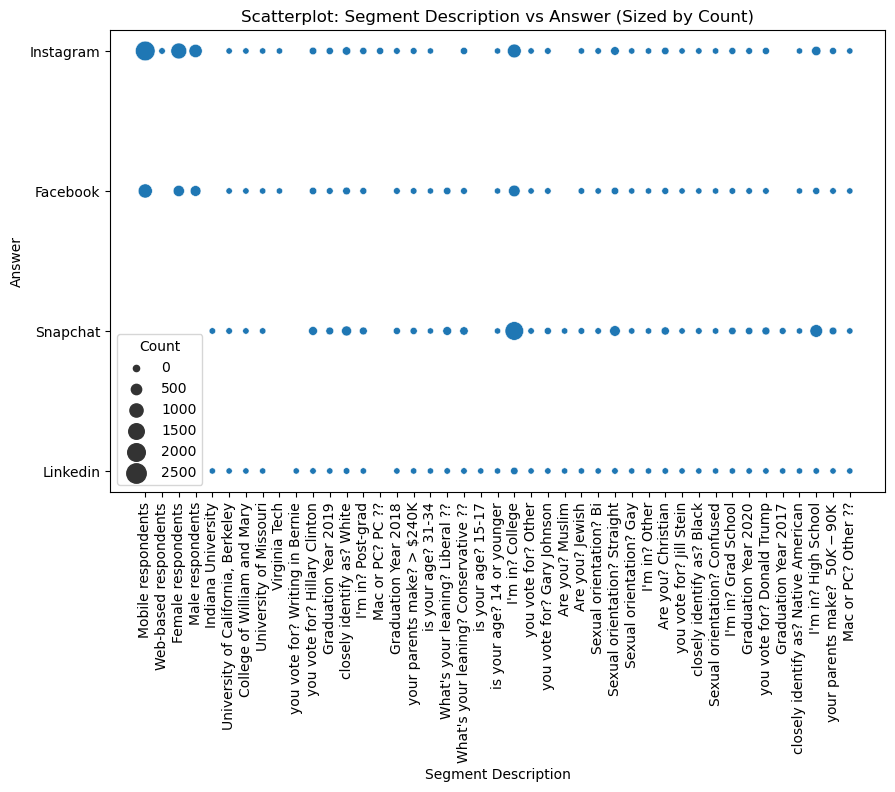

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Segment Description', y='Answer', size='Count', data=df, sizes=(20, 200), palette='cool')

plt.title('Scatterplot: Segment Description vs Answer (Sized by Count)')
plt.xlabel('Segment Description')
plt.ylabel('Answer')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()
